<a href="https://colab.research.google.com/github/shibania/End-To-End-Lung-Cancer-Prediction/blob/main/Lung_Cancer_Prediction(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=7c13fdda1428e07b68bad1b035ce396af3febbf88cc455dfcc29485421e057fb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-cb48aeb10e34>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/survey lung cancer (1).csv')
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
dataset.shape

(309, 16)

In [6]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
dataset.tail(13)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
296,M,63,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
297,F,47,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
298,M,62,2,1,2,1,1,2,1,2,2,2,2,1,2,YES
299,M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
300,F,63,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
301,M,64,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
302,F,65,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
303,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES


In [8]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
dataset.duplicated().sum()

33

In [10]:
df = dataset.drop_duplicates()

In [11]:
df.shape

(276, 16)

In [12]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [14]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [16]:
colors=['#FBE7A3','#FFFFFF']

In [17]:
def catplot(df,x):
  sns.set(style='white')
  fig = plt.subplots(1,3,figsize = (18,4))
  title = x + ' vs LUNG CANCER'
  plt.suptitle(title)

  plt.subplot(1,3,1)
  df[x].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, textprops={'fontsize': '7'} )


  plt.subplot(1,3,2)
  ax = sns.histplot(data=df, x=x, kde = True, color=colors[0], edgecolor='k')
  ax.bar_label(ax.containers[0])

  plt.subplot(1,3,3)
  ax = sns.countplot(data=df, x=x, hue='LUNG_CANCER', palette = colors, edgecolor = 'k')
  for container in ax.containers:
    ax.bar_label(container)

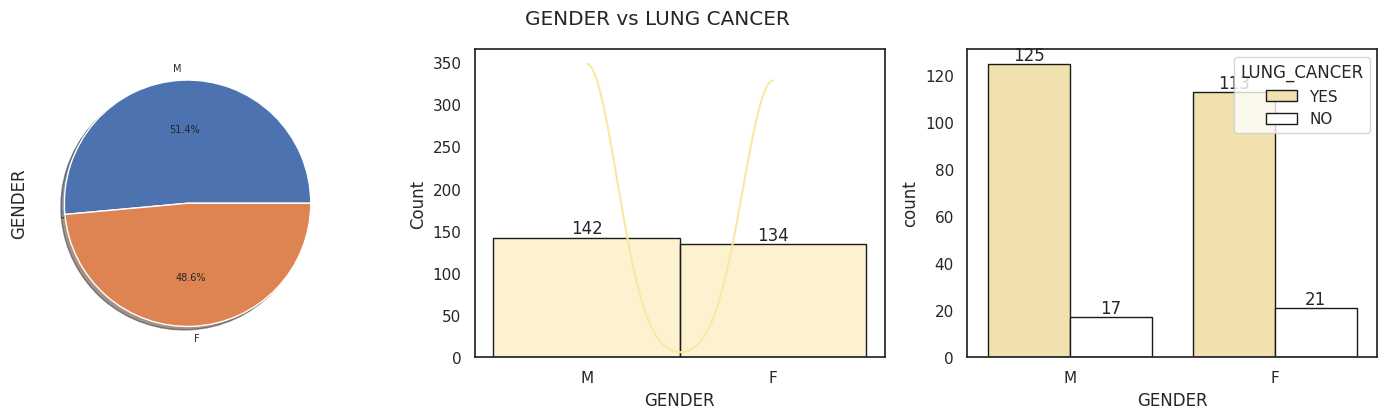

In [18]:
catplot(df, 'GENDER')

In [19]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767


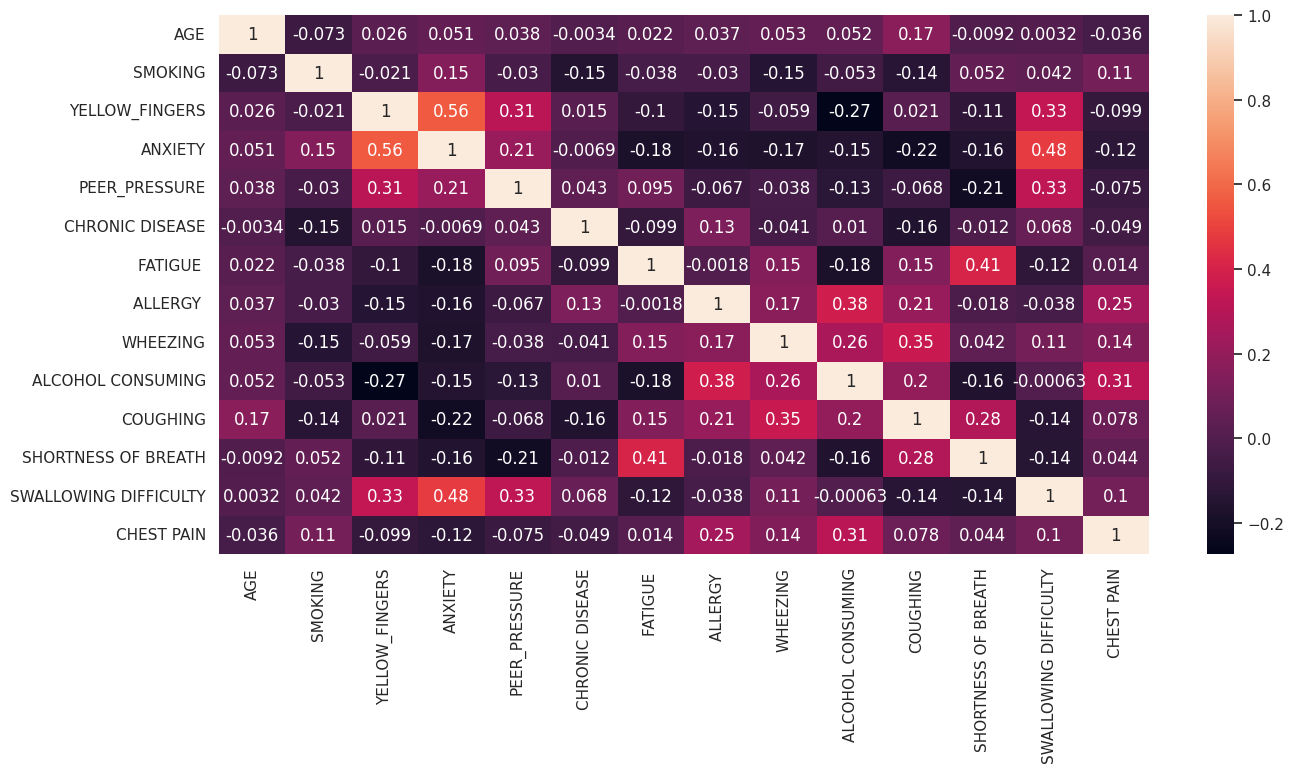

In [20]:
import seaborn as sns
plt.figure(figsize=(15,7))
p= sns.heatmap(df.corr(),annot=True)

In [21]:
x = df.iloc[:,:-1]
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2


In [22]:
y = df.iloc[:,-1].values
y

array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YE

In [23]:
df['LUNG_CANCER'].value_counts()

YES    238
NO      38
Name: LUNG_CANCER, dtype: int64

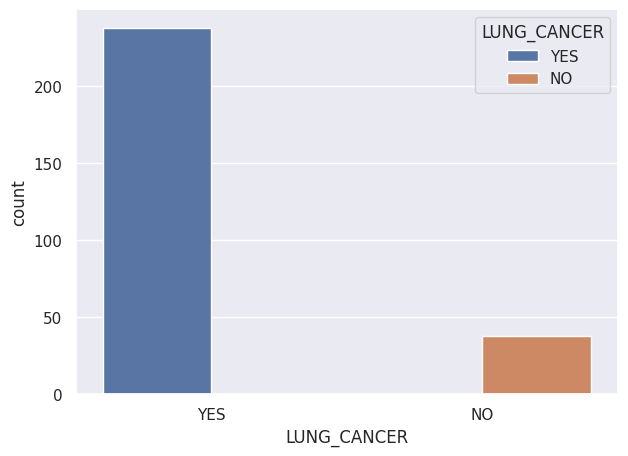

In [24]:
#Pictorial Representation of two classes present in the dataset
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x ='LUNG_CANCER', hue = "LUNG_CANCER", data = df)
plt.show()

In [25]:
y

array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YE

**ENCODING THE CATEGORICAL DATA**

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1]


In [27]:
x['GENDER'] = x['GENDER'].replace('F',0)
x['GENDER'] = x['GENDER'].replace('M',1)
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2


In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
dtypes: int64(15)
memory usage: 42.6 KB


**SPLITTING OF DATA**

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
x_train.shape

(220, 15)

In [31]:
y_train.shape

(220,)

**HANDLING IMBALANCED DATA**

In [32]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x_train,y_train=oversample.fit_resample(x_train,y_train)

**STANDARDISING THE DATA**

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**LOGISTIC REGRESSION**

In [34]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LogisticRegModel=LogisticRegression(max_iter=100,random_state=0)
cf=LogisticRegModel.fit(x_train,y_train)

print("The intercept is:",cf.intercept_)
print("The co-efficients are:",cf.coef_)

y_pred=LogisticRegModel.predict(x_test)



The intercept is: [0.2125427]
The co-efficients are: [[-0.21143648 -0.04532142  0.8367956   0.65608948  0.80443354  0.78871721
   1.33652881  1.12326353  0.89744281  0.61246057  0.71500682  1.41012559
   0.40031945  1.08524096  0.34302154]]


In [35]:
#EVALUATION METRICS FOR LOGISTIC REGRESSION
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 7  2]
 [ 4 43]]
accuracy: 0.8928571428571429
recall score: 0.9148936170212766
precision score: 0.9555555555555556
f1 score: 0.9347826086956522


**DECISION TREE**

In [36]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=10,criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [37]:
y_pred=dtc.predict(x_test)

In [38]:
#EVALUATION MATRIX FOR DECISION TREE
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 7  2]
 [ 4 43]]
accuracy: 0.8928571428571429
recall score: 0.9148936170212766
precision score: 0.9555555555555556
f1 score: 0.9347826086956522


**RANDOM FOREST**

In [39]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,max_depth=10,random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)

In [40]:
y_pred=rfc.predict(x_test)

In [41]:
#EVALUATION MATRIX FOR RANDOM FOREST
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 7  2]
 [ 4 43]]
accuracy: 0.8928571428571429
recall score: 0.9148936170212766
precision score: 0.9555555555555556
f1 score: 0.9347826086956522


**SUPPORT VECTOR MACHINE**

In [42]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
svcl=SVC(gamma='auto',decision_function_shape="ovo",kernel='rbf',random_state=0)
svcl.fit(x_train,y_train)

SVC(decision_function_shape='ovo', gamma='auto', random_state=0)

In [43]:
y_pred=svcl.predict(x_test)

In [44]:
#EVALUATION MATRIX FOR SVM
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 6  3]
 [ 3 44]]
accuracy: 0.8928571428571429
recall score: 0.9361702127659575
precision score: 0.9361702127659575
f1 score: 0.9361702127659575


**BAGGING CLASSIFIER**

In [45]:
# BAGGING CLASSIFIER
from sklearn.ensemble import BaggingClassifier
classifier=BaggingClassifier(n_estimators=10,bootstrap=True,n_jobs=10,max_features=1,random_state=0)
classifier.fit(x_train,y_train)

BaggingClassifier(max_features=1, n_jobs=10, random_state=0)

In [46]:
y_pred=classifier.predict(x_test)

In [47]:
#EVALUATION MATRIX FOR BAGGING
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 8  1]
 [ 9 38]]
accuracy: 0.8214285714285714
recall score: 0.8085106382978723
precision score: 0.9743589743589743
f1 score: 0.8837209302325582


**ADABOOST CLASSIFIER**

In [48]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=25,learning_rate=10,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=10, n_estimators=25, random_state=0)

In [49]:
y_pred=adaboost.predict(x_test)

In [50]:
#EVALUATION MATRIX FOR ADABOOST CLASSIFIER
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 0  9]
 [ 0 47]]
accuracy: 0.8392857142857143
recall score: 1.0
precision score: 0.8392857142857143
f1 score: 0.9126213592233009


**KNEAREST NEIGHBORS**

In [51]:
#KNEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred=knc.predict(x_test)

In [53]:
#EVALUATION MATRIX FOR KNEAREST NEIGHBORS
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 8  1]
 [ 4 43]]
accuracy: 0.9107142857142857
recall score: 0.9148936170212766
precision score: 0.9772727272727273
f1 score: 0.945054945054945


**PLOT FOR COMPARING ACCURACY OF VARIOUS MODELS**

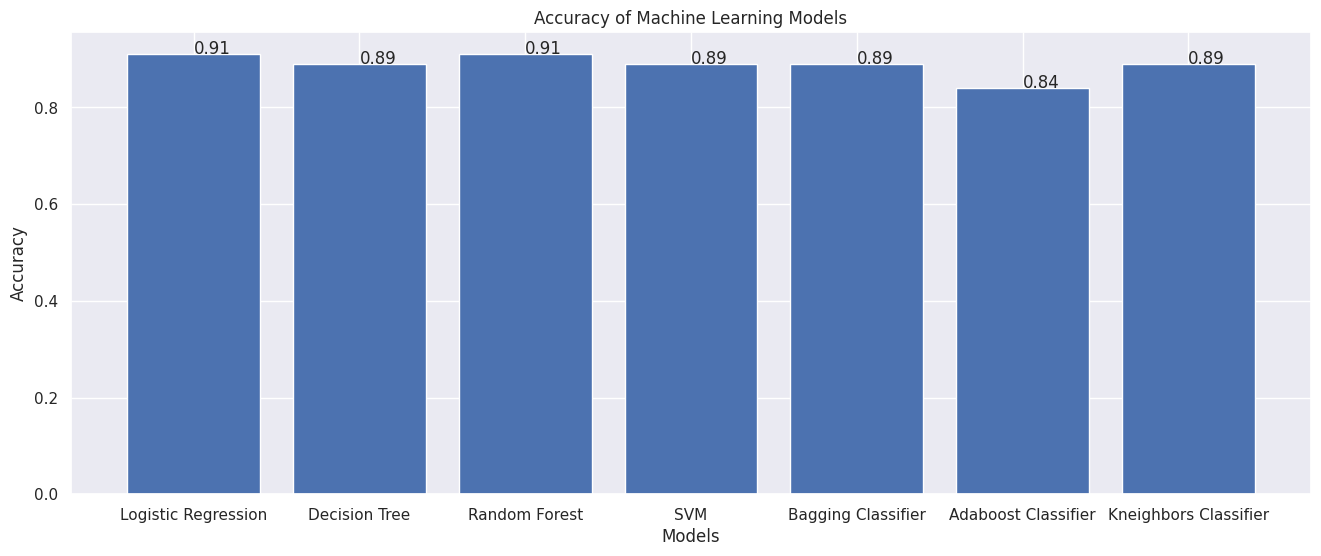

In [54]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Bagging Classifier', 'Adaboost Classifier', 'Kneighbors Classifier']
accuracy = [0.91,0.89,0.91,0.89,0.89,0.84,0.89]

fig, ax = plt.subplots()
ax.bar(models, accuracy)

# Set the figure size
fig.set_size_inches(16, 6)  # Adjust the width and height as desired

for index, value in enumerate(accuracy):
    plt.text(index, value, str(value))

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Machine Learning Models')

# Display the plot
plt.show()

LOGISTIC REGRESSION SHOW HIGH ACCURACY AMONG VARIOUS MACHING LEARNING ALGORITHM

*   LOGISTIC REGRESSION =0.91
*   DECISION TREE       =0.89
*   RANDOM FOREST       =0.91
*   SVM                 =0.89
*   BAGGING CLASSIFIER  =0.89
*   ADABOOST CLASSIFIER =0.84
*   KNEIGHBORS          =0.89

**FEATURE SELECTION USING ANOVA**

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=5)
z = select.fit_transform(x,y)

print("After selecting best 5 features:", z.shape)

New_features=select.get_feature_names_out()
list(New_features)

After selecting best 5 features: (276, 5)


['ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SWALLOWING DIFFICULTY']

**DETECTING IMPORTANT FEATURE**

Feature ranking:
1. Feature 1: 0.215686509644144
2. Feature 10: 0.0889219353446582
3. Feature 8: 0.08365443590666793
4. Feature 5: 0.06504276503441962
5. Feature 3: 0.061536038054775075
6. Feature 6: 0.060685991007484966
7. Feature 9: 0.05658513139699589
8. Feature 7: 0.055651075352206904
9. Feature 13: 0.05543904804178118
10. Feature 4: 0.05161781143331692
11. Feature 11: 0.049219717827346646
12. Feature 14: 0.04259926346648798
13. Feature 12: 0.03992381817139913
14. Feature 0: 0.03868062232164743
15. Feature 2: 0.03475583699666806


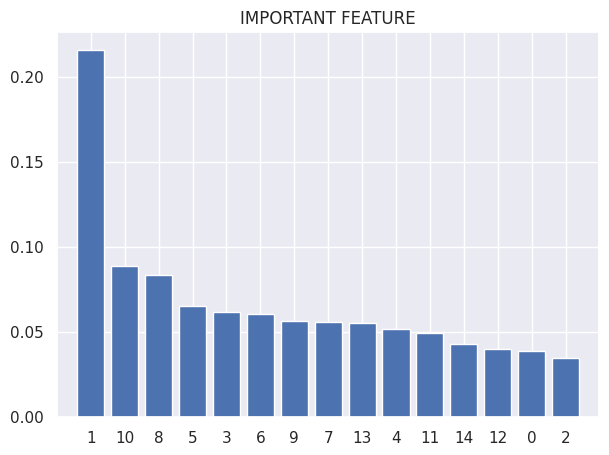

In [56]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier()
rf.fit(x, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x.shape[1]):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")

import matplotlib.pyplot as plt
plt.figure()
plt.title("IMPORTANT FEATURE")
plt.bar(range(x.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

**CROSS VALIDATION SCORE**


In [57]:
from sklearn.model_selection import cross_val_score
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier()
]

for model in models:
    scores = cross_val_score(model, x, y, cv=15)

    # Print the cross-validation scores for the current model
    print("Model:", type(model).__name__)
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy: {:.2f}".format(scores.mean()))
    print("Standard Deviation: {:.2f}".format(scores.std()))
    print()

Model: LogisticRegression
Cross-Validation Scores: [0.89473684 0.89473684 0.89473684 0.84210526 0.94736842 0.89473684
 0.88888889 1.         0.94444444 0.88888889 0.83333333 1.
 0.94444444 0.88888889 0.88888889]
Mean Accuracy: 0.91
Standard Deviation: 0.05

Model: RandomForestClassifier
Cross-Validation Scores: [0.89473684 0.84210526 0.89473684 0.84210526 0.89473684 0.89473684
 0.77777778 0.83333333 1.         0.88888889 0.88888889 0.94444444
 0.94444444 0.94444444 0.88888889]
Mean Accuracy: 0.89
Standard Deviation: 0.05

Model: SVC
Cross-Validation Scores: [0.84210526 0.84210526 0.84210526 0.84210526 0.84210526 0.84210526
 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.88888889 0.83333333 0.83333333]
Mean Accuracy: 0.86
Standard Deviation: 0.02

Model: DecisionTreeClassifier
Cross-Validation Scores: [0.94736842 0.63157895 0.89473684 0.89473684 0.94736842 0.84210526
 0.77777778 0.88888889 0.94444444 0.88888889 0.66666667 0.83333333
 0.83333333 0.94444444 0.8888888

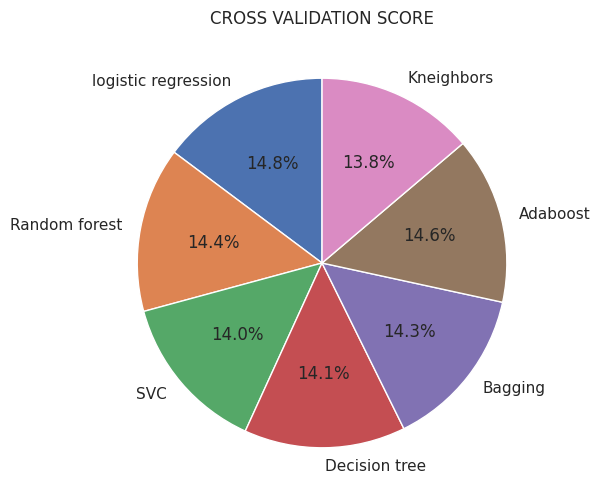

In [65]:
import matplotlib.pyplot as plt

# Scores obtained from ML models
mean_accuracy = [0.91,0.89,0.86,0.87,0.88,0.90,0.85]

# Model names corresponding to the scores
model_names = ['logistic regression', 'Random forest','SVC', 'Decision tree','Bagging','Adaboost','Kneighbors' ]

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(mean_accuracy,labels=model_names,autopct='%1.1f%%',startangle=90)
# Add a title
plt.title('CROSS VALIDATION SCORE')

# Display the chart
plt.show()

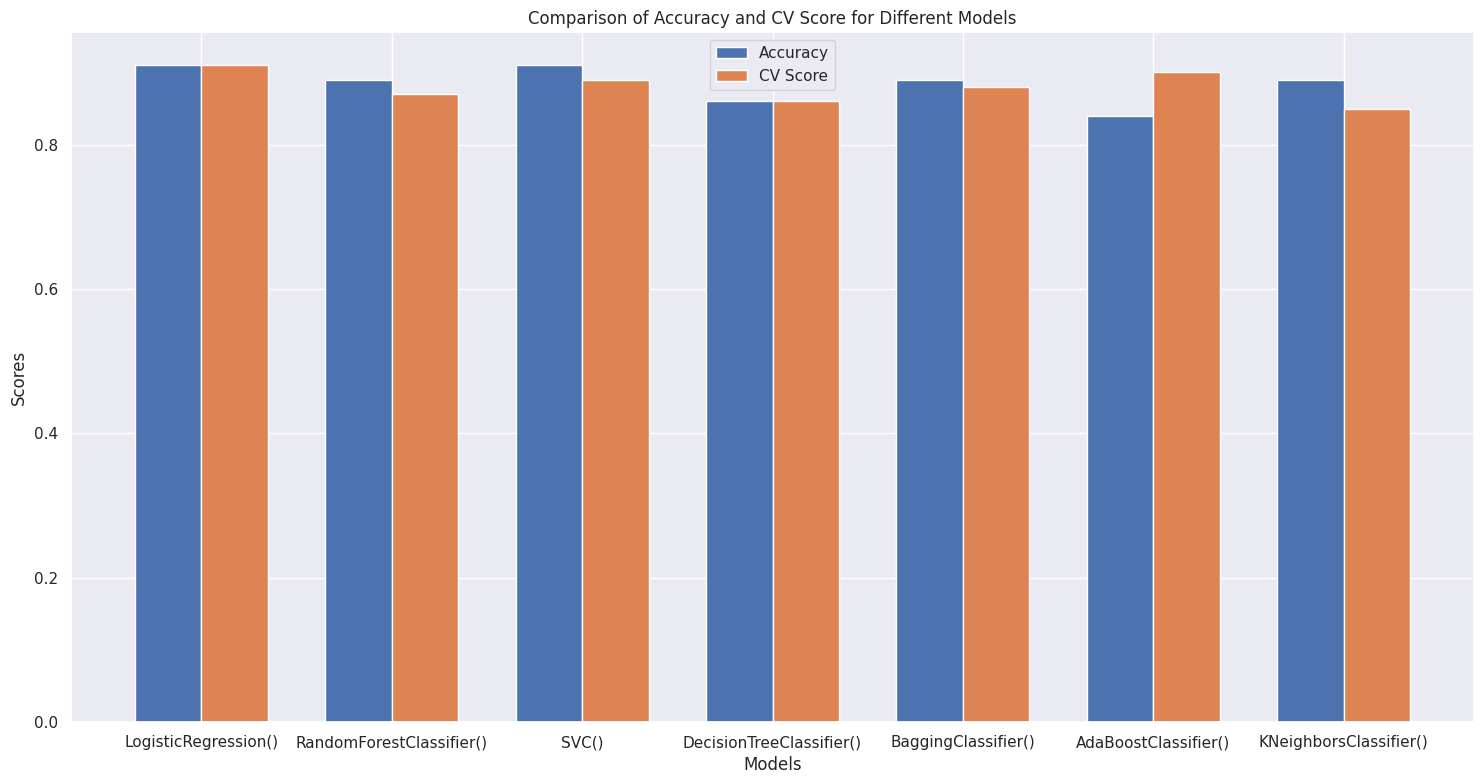

In [74]:
import matplotlib.pyplot as plt

accuracy_scores = [0.91,0.89,0.91,0.86,0.89,0.84,0.89]

mean_cv_scores = [0.91,0.87,0.89,0.86,0.88,0.90,0.85]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'Bagging Classifier', 'Adaboost Classifier', 'Kneighbors Classifier']
bar_width=0.35

# Create a bar chart
fig, ax=plt.subplots(figsize=(15,8))

bar_positions1=range(len(model_names))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax.bar(bar_positions1, accuracy_scores, bar_width, label='Accuracy')
ax.bar(bar_positions2, mean_cv_scores, bar_width, label='CV Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy and CV Score for Different Models')
ax.set_xticks([pos + bar_width/2 for pos in bar_positions1])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


**HYPERPARAMETER TUNING**

In [60]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=0.1, solver='liblinear')


In [61]:
from sklearn.linear_model import LogisticRegression
LogisticRegModel=LogisticRegression(C=0.1,max_iter=100,penalty='l2',solver='liblinear')
cf=LogisticRegModel.fit(x_train,y_train)

print("The intercept is:",cf.intercept_)
print("The co-efficients are:",cf.coef_)

y_pred=LogisticRegModel.predict(x_test)

The intercept is: [0.09803025]
The co-efficients are: [[0.01974225 0.12337501 0.4076383  0.47016805 0.45961937 0.48841474
  0.65658109 0.6116781  0.67408595 0.45816072 0.54630101 0.66386942
  0.33891747 0.53731713 0.32104161]]


In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 8  1]
 [ 3 44]]
accuracy: 0.9285714285714286
recall score: 0.9361702127659575
precision score: 0.9777777777777777
f1 score: 0.9565217391304347


**INFERENCE**

*   Feature 'Allergy' is more influencing feature in this dataset
*   Logistic Regression shows the highest accuracy among other machine learning algorithm
*   Logistic Regression shows high performance with cross validation split





















In [63]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(LogisticRegModel, f)